In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
import data

In [20]:
voters = pd.read_excel('data/voters.xlsx')
preferences = pd.read_excel('data/preferences.xlsx')
polling_stations = pd.read_excel('data/polling_stations.xlsx')

In [21]:
voters.head()

,Unnamed: 0,voter,discount
0,0,voter_1,0.09
1,1,voter_2,0.00
2,2,voter_3,0.07
3,3,voter_4,0.00
4,4,voter_5,0.10


QUICK EDA

In [22]:
voters.describe()

,Unnamed: 0,discount
count,4000.000000,4000.000000
mean,1999.500000,0.093948
std,1154.844867,0.058057
min,0.000000,0.000000
25%,999.750000,0.040000
50%,1999.500000,0.100000
75%,2999.250000,0.140000
max,3999.000000,0.190000


In [23]:
polling_stations.describe()

,Unnamed: 0,voting_booth,station_cost
count,400.000000,400.000000,400.000000
mean,199.500000,11.542500,177.645000
std,115.614301,4.387633,73.159379
min,0.000000,5.000000,50.000000
25%,99.750000,8.000000,116.750000
50%,199.500000,11.000000,183.000000
75%,299.250000,15.000000,238.250000
max,399.000000,19.000000,299.000000


In [24]:
preferences.describe()

,Unnamed: 0,preference_priority
count,99533.000000,99533.000000
mean,49766.000000,17.011102
std,28732.846509,11.688444
min,0.000000,1.000000
25%,24883.000000,7.000000
50%,49766.000000,15.000000
75%,74649.000000,25.000000
max,99532.000000,49.000000


In [25]:
# I verify if there are missing values 
missing_values_count = voters.isna().sum
print(missing_values_count)

<bound method DataFrame.sum of       Unnamed: 0  voter  discount
0          False  False     False
1          False  False     False
2          False  False     False
3          False  False     False
4          False  False     False
...          ...    ...       ...
3995       False  False     False
3996       False  False     False
3997       False  False     False
3998       False  False     False
3999       False  False     False

[4000 rows x 3 columns]>


In [26]:
# I verify if there are missing values 
st_missing_values_count = polling_stations.isna().sum
print(st_missing_values_count)

<bound method DataFrame.sum of      Unnamed: 0  polling_station  voting_booth  station_cost
0         False            False         False         False
1         False            False         False         False
2         False            False         False         False
3         False            False         False         False
4         False            False         False         False
..          ...              ...           ...           ...
395       False            False         False         False
396       False            False         False         False
397       False            False         False         False
398       False            False         False         False
399       False            False         False         False

[400 rows x 4 columns]>


In [27]:
# I verify if there are missing values 
pr_missing_values_count = preferences.isna().sum
print(pr_missing_values_count)

<bound method DataFrame.sum of        Unnamed: 0  voter  polling_station  preference_priority
0           False  False            False                False
1           False  False            False                False
2           False  False            False                False
3           False  False            False                False
4           False  False            False                False
...           ...    ...              ...                  ...
99528       False  False            False                False
99529       False  False            False                False
99530       False  False            False                False
99531       False  False            False                False
99532       False  False            False                False

[99533 rows x 4 columns]>


In [28]:
# STRATEGY: RANDOM ALLOCATION

# random generate random numbers or permit to execute random operations
import random

# I define this function with the two arguments
def random_allocation(voters, polling_stations):
    # I use numpy library to mix the order of the voters
    np.random.shuffle(voters)
    # create an empty dictionary
    allocation = {}

    for voter in voters:
        #every voter get assigned a polling_station
        station = np.random.choice(polling_stations)
        # if the station is already in the dictionary, the voter get appended as a new element
        if station in allocation:
            allocation[station].append(voter)
        #otherwise the program creates a new key and the voter is the associated value
        else:
            allocation[station] = [voter]
    return allocation

voters = voters['voter'].values
polling_stations = polling_stations['polling_station'].values

allocation_result = random_allocation(voters, polling_stations)

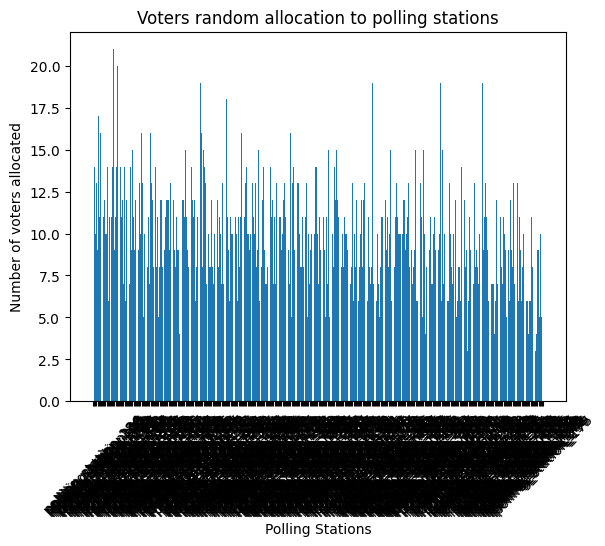

In [12]:
plt.bar(allocation_result.keys(),[len(voters) for voters in allocation_result.values()])
plt.xlabel('Polling Stations')
plt.ylabel('Number of voters allocated')
plt.title('Voters random allocation to polling stations')
plt.xticks(rotation=45)
plt.show()